In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!apt-get install unrar



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [22]:
!mkdir -p /content/data


In [23]:
!unrar x "/content/drive/MyDrive/Downloads.rar" /content/data/


Streaming output truncated to the last 5000 lines.
Extracting  /content/data/test/Real/real_1370.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1371.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1372.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1373.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1374.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1375.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1376.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1377.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1378.jpg                         97%  OK 
Extracting  /content/data/test/Real/real_1379.jpg                         97%  OK 
Extracting  /content/data/tes

In [24]:
!ls /content/data


test  train  val


In [25]:
!ls /content/data
!ls /content/data/train
!ls /content/data/val
!ls /content/data/test


test  train  val
Fake  Real
Fake  Real
Fake  Real


In [26]:
base_dir = "/content/data"

train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [28]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Class indices:", train_gen.class_indices)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Class indices: {'Fake': 0, 'Real': 1}


In [29]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [31]:
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 736s 167ms/step - accuracy: 0.7876 - loss: 0.4327 - val_accuracy: 0.8911 - val_loss: 0.2498
Epoch 2/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 691s 158ms/step - accuracy: 0.9183 - loss: 0.2001 - val_accuracy: 0.9079 - val_loss: 0.2225
Epoch 3/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 679s 155ms/step - accuracy: 0.9319 - loss: 0.1684 - val_accuracy: 0.9229 - val_loss: 0.2020
Epoch 4/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 678s 155ms/step - accuracy: 0.9388 - loss: 0.1527 - val_accuracy: 0.9222 - val_loss: 0.1961
Epoch 5/5
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 677s 155ms/step - accuracy: 0.9450 - loss: 0.1399 - val_accuracy: 0.9197 - val_loss: 0.2076


In [32]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)


341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9199 - loss: 0.1782
Test Accuracy: 0.887116014957428


In [33]:
test_gen.reset()
y_pred = (model.predict(test_gen) > 0.5).astype(int).ravel()
y_true = test_gen.classes

labels = list(test_gen.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=labels))
print(confusion_matrix(y_true, y_pred))


341/341 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step
              precision    recall  f1-score   support

        Fake       0.86      0.93      0.89      5492
        Real       0.92      0.85      0.88      5413

    accuracy                           0.89     10905
   macro avg       0.89      0.89      0.89     10905
weighted avg       0.89      0.89      0.89     10905

[[5093  399]
 [ 832 4581]]


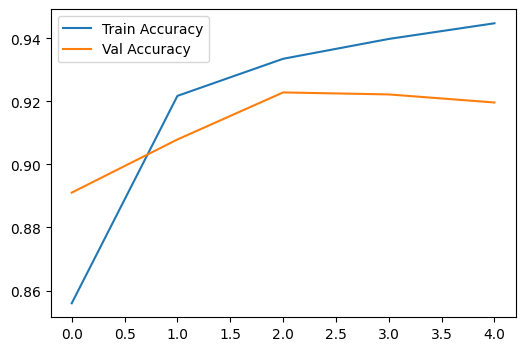

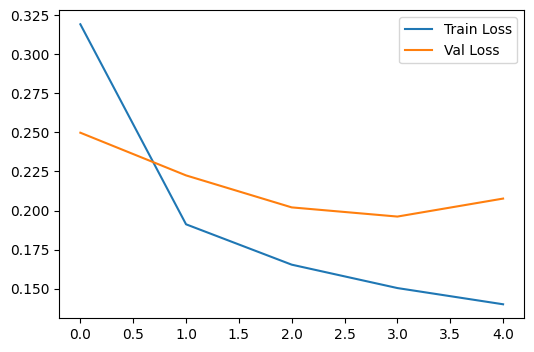

In [34]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
